In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

In [2]:
def R(roll, yaw, pitch):
    cosr, sinr = np.cos(roll), np.sin(roll) 
    cosy, siny = np.cos(yaw), np.sin(yaw)
    cosp, sinp = np.cos(pitch), np.sin(pitch) 
    rot = [[cosy*cosp, cosy*sinp*sinr-siny*cosr, cosy*sinp*cosr+siny*sinr],  
           [siny*cosp, siny*sinp*sinr+cosy*cosr, siny*sinp*cosr-cosy*sinr], 
           [-sinp, cosp*sinr, cosp*cosr]] 
    return np.array(rot)

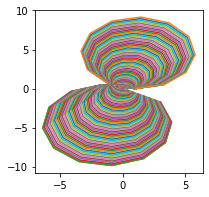

In [40]:
fig = plt.figure()
ax = fig.add_subplot()#projection='3d')

frames = np.arange(100)

rot = R(0, np.pi/6, 0)
    
def ani_f(t):

    b = np.array([t*0.05-2.5, 0, 0])
    x = [np.array([1, 0, 0])]
    for i in range(1, 12):
        x.append(rot @ x[i-1] + b)
    x = np.array(x)
        
    im = ax.plot(x[:, 0], x[:, 1])
    return im

fig.set_size_inches(3, 3)
ani = matplotlib.animation.FuncAnimation(fig, ani_f, frames=frames, blit=True)
HTML(ani.to_jshtml())

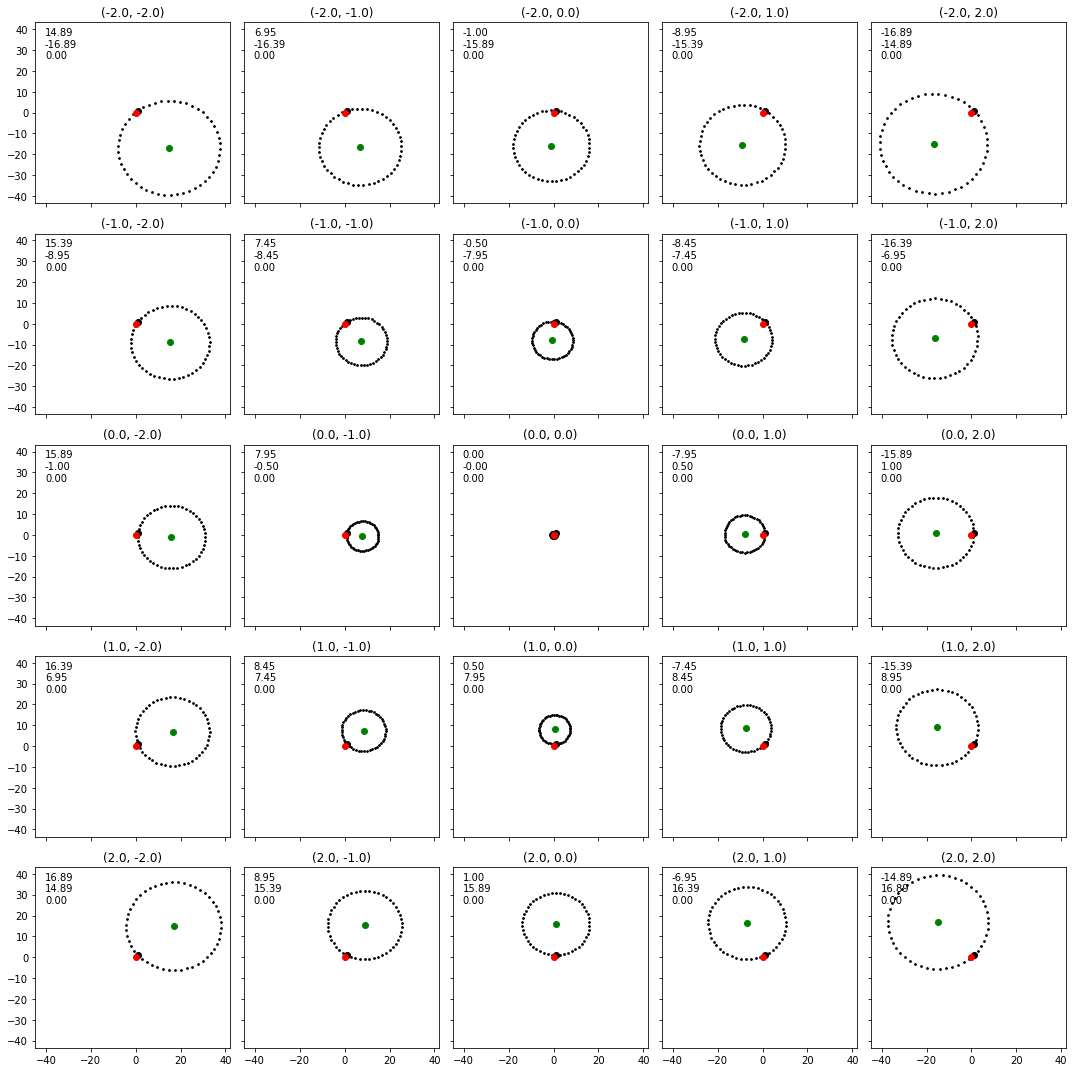

In [76]:
fig, ax = plt.subplots(5, 5, figsize=(15, 15), sharex='all', sharey='all')
rot = R(0, np.pi/25, 0)

for r in range(5):
    for c in range(5):
        x = np.array([1, 1, 0], dtype=np.float64)
        ax[r, c].scatter(x[0], x[1], c='black')
        b = np.array([r-2, c-2, 0])
        xmean = x
        for i in range(1, 50):
            x = rot @ x + b
            xmean += x
            ax[r, c].scatter([0, x[0]], [0, x[1]], c='black', s=3)
        xmean /= 50
        ax[r, c].scatter(xmean[0], xmean[1], c='g')
        ax[r, c].scatter(0, 0, c='r')
        ax[r, c].set_title('(%.1f, %.1f)' % (r-2, c-2))
        txtstr = '\n'.join(['%.2f' % i for i in xmean])
        ax[r, c].text(0.05, 0.8, txtstr, transform=ax[r, c].transAxes)
fig.tight_layout()

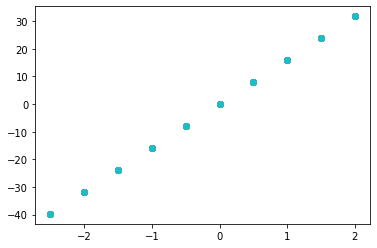

In [81]:
rot = R(0, np.pi/25, 0)
xmeans = np.zeros((10, 10, 3))
for r in range(10):
    for c in range(10):
        x = np.array([1, 1, 0], dtype=np.float64)
        b = np.array([r-5, 0, 0])
        xmean = x
        for i in range(1, 50):
            x = rot @ x + b
            xmean += x
        xmean /= 50
        xmeans[r, c] = xmean
        plt.scatter(xmeans[r, c, 0], xmeans[r, c, 1])